In [57]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import pdb
import copy
from scipy import sparse
import anndata
import cerberus
import plotly.io as pio



p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [32]:
h5 = 'cerberus_annot.h5'
ab = '../talon/human_talon_abundance.tsv'
filt_ab = 'cerberus_filtered_abundance.tsv'
obs_col = 'sample'
min_tpm = 1
major_set = 'swan/isos_sample_gene_90.tsv'
mm_tissues = ['adrenal gland', 'heart',
              'muscle', 'brain', 'pgp1_excite_neuron',
              'pgp1_astro', 'h9_osteocyte']

In [2]:
ca = cerberus.read('cerberus_annot_triplets.h5')

In [45]:
df = pd.DataFrame()
df['gid'] = []
df['source'] = []
df['sector'] = []
for source in ['obs_major', 'obs_det']:
    temp = ca.triplets.loc[ca.triplets.source == source]
    temp = assign_gisx_sector(temp)
    temp = temp[['gid', 'source', 'sector']]
    df = df.merge(temp, how='outer', on='gid', suffixes=('', '_{}'.format(source)))

df.drop(['source', 'sector'], axis=1, inplace=True)

In [48]:
# temp fix until I make sure I'm only considering isoforms >= 1 tpm in major set
df = df.loc[~df.source_obs_det.isnull()]

In [49]:
df.loc[df.source_obs_det.isnull()]

,gid,source_obs_major,sector_obs_major,source_obs_det,sector_obs_det


In [51]:
# check to see where nan source_obs_dets are coming from
# df = pd.read_csv(filt_ab, sep='\t')
# df, tids = get_tpm_table(df,
#                how='iso',
#                min_tpm=0)
# df.reset_index(inplace=True)
# beep = df.loc[df.annot_transcript_id.str.contains('ENSG00000285978')].set_index('annot_transcript_id').transpose()
# beep.loc[beep['ENSG00000285978[1,1,1]']>0]

In [53]:
df.drop(['source_obs_major', 'source_obs_det'], axis=1, inplace=True)
df = df.groupby(['sector_obs_major', 'sector_obs_det']).count().reset_index()

In [54]:
df.head()

,sector_obs_major,sector_obs_det,gid
0,mixed,mixed,7706
1,mixed,simple,440
2,mixed,splicing,275
3,mixed,tes,684
4,mixed,tss,311


{'tss': '#56B4E9', 'splicing': '#CC79A7', 'tes': '#E69F00', 'simple': '#000000', 'mixed': '#b7b7b7'}


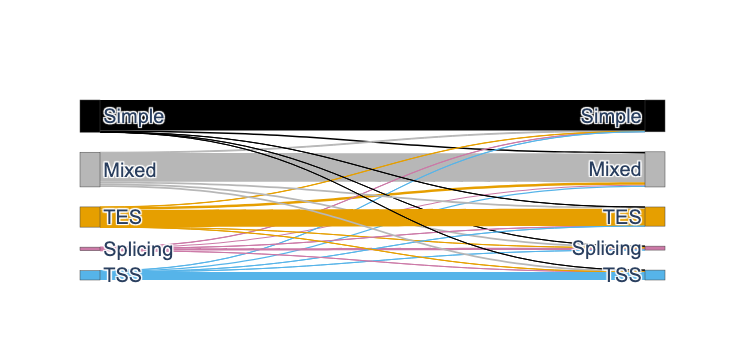

In [58]:
ofile = 'figures/obs_det_obs_major_sankey.pdf'
fig = plot_sankey(df,
                  source='sector_obs_det',
                  sink='sector_obs_major',
                  counts='gid',
                  color='sector',
                  title='')
pio.write_image(fig, ofile, width=1400, height=700)